In [20]:
import seaborn as sns
import pandas as pd 
import datetime as datetime
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import numpy as np
# Read data from file 'filename.csv' |
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
pd.options.display.float_format = '{:,.2f}'.format
data = pd.read_csv("/home/anconam/projects/Shapley_Pruning/experiments/results/log.csv.cifar10") 
data['timestamp'].apply(lambda row: str(row))
data.head()

,timestamp,epoch,train_acc,test_acc,train_loss,test_loss,n_params,n_params_full,activations,train_time,prune_time,experiment
0,20200118T224708,37,0.93,0.84,0.20,0.55,1694090,14719818,99-86-83-69-92-212-204-207-111-118-91-62-43,86.88,1.83,cifar10__random_gap:1.0_steps:50_start:1_int:1
1,20200118T224708,38,0.94,0.84,0.19,0.58,1674638,14719818,99-86-83-69-92-212-204-207-111-118-79-62-43,89.35,1.37,cifar10__random_gap:1.0_steps:50_start:1_int:1
2,20200118T224708,39,0.95,0.84,0.16,0.56,1672440,14719818,99-86-83-69-92-212-204-207-111-118-79-60-43,92.09,1.18,cifar10__random_gap:1.0_steps:50_start:1_int:1
3,20200119T002012,1,0.52,0.63,1.35,1.05,14728266,14728266,512-512-512-512-512-512-256-256-256-128-128-64-64,337.09,0.00,cifar10__random_s:1.0_steps:0_start:0_int:1
4,20200119T002012,2,0.71,0.72,0.83,0.82,14728266,14728266,512-512-512-512-512-512-256-256-256-128-128-64-64,336.62,0.00,cifar10__random_s:1.0_steps:0_start:0_int:1


### FMNIST CNN 1.8M parameters

In [21]:
dataset = "cifar10"

plot_df = data[data["experiment"].str.startswith(dataset)]
# plot_df = plot_df[plot_df["timestamp"] >= "20200116T164457"]
# plot_df = plot_df[~plot_df["experiment"].str.contains("prunedyn_sv")]
# plot_df = plot_df[~plot_df["experiment"].str.contains("in1ep")]
# plot_df = plot_df[~plot_df["experiment"].str.contains("random")]
# plot_df = plot_df[~plot_df["experiment"].str.contains("30steps")]

# Some processing
plot_df['test_acc'] *= 100
plot_df['train_acc'] *= 100
plot_df["sparsity"] = plot_df["n_params"] / plot_df["n_params_full"] * 100
plot_df["test_acc_gap"] = (plot_df["test_acc"] - plot_df["test_acc"].max()) / plot_df["test_acc"].max() * 100


In [22]:
# Rank pruning methods by Test Accuracy at the epoch of Minimum Test Loss
df_join = plot_df.join(plot_df.groupby(["timestamp"])["test_loss"].min(), on="timestamp", rsuffix="_min")
df_join = df_join[df_join["test_loss"] == df_join["test_loss_min"]]
df_join = df_join.groupby(["experiment"]).mean().sort_values(by=["test_acc"], ascending=False)
df_join.filter(["experiment", "test_acc", "test_acc_gap", "sparsity", "epoch", "test_loss"])

,test_acc,test_acc_gap,sparsity,epoch,test_loss
experiment,,,,,
cifar10__random_s:1.0_steps:0_start:0_int:1,87.64,0.00,100.00,100,0.48
cifar10__random_gap:1.0_steps:50_start:1_int:1,83.95,-4.21,11.51,37,0.55


In [18]:
# Rank pruning methods by best test accuracy during training and sparsity at that stage
df_join = plot_df.join(plot_df.groupby(["timestamp"])["test_acc"].max(), on="timestamp", rsuffix="_max")
df_join = df_join[df_join["test_acc"] == df_join["test_acc_max"]]
df_join = df_join.groupby(["experiment"]).mean().sort_values(by=["test_acc"], ascending=False)
df_join.filter(["experiment", "test_acc", "test_acc_gap", "sparsity", "epoch", "test_loss"])

,test_acc,test_acc_gap,sparsity,epoch,test_loss
experiment,,,,,
cifar10__random_s:1.0_steps:0_start:0_int:1,87.64,0.00,100.00,100,0.48
cifar10__random_gap:1.0_steps:50_start:1_int:1,84.16,-3.97,11.36,39,0.56


Accuracy
                                                test_acc
experiment                                              
cifar10__random_gap:1.0_steps:50_start:1_int:1     84.16
cifar10__random_s:1.0_steps:0_start:0_int:1        87.64
Training time
                                                train_time  prune_time
experiment                                                            
cifar10__random_gap:1.0_steps:50_start:1_int:1      268.31        4.38
cifar10__random_s:1.0_steps:0_start:0_int:1      33,951.07        0.00
Sparsity
                                                n_params
experiment                                              
cifar10__random_gap:1.0_steps:50_start:1_int:1     11.36
cifar10__random_s:1.0_steps:0_start:0_int:1       100.00


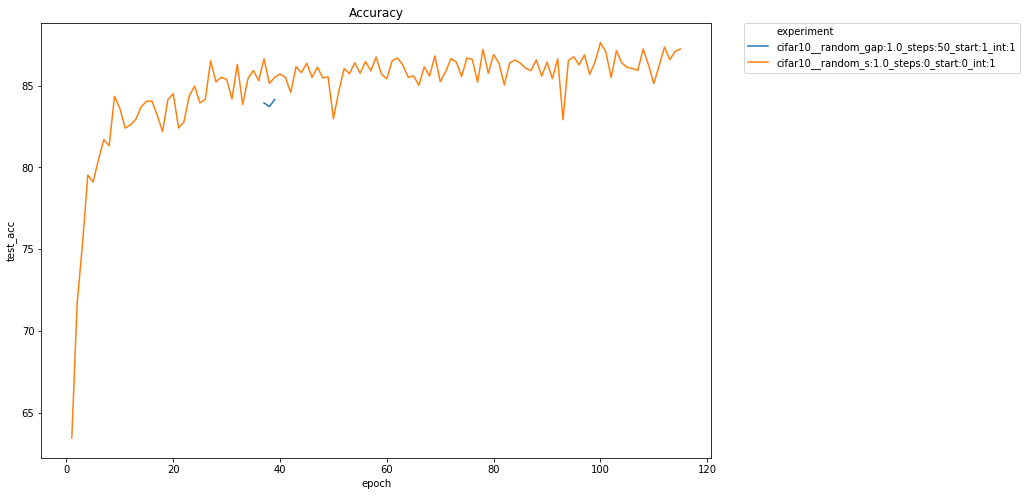

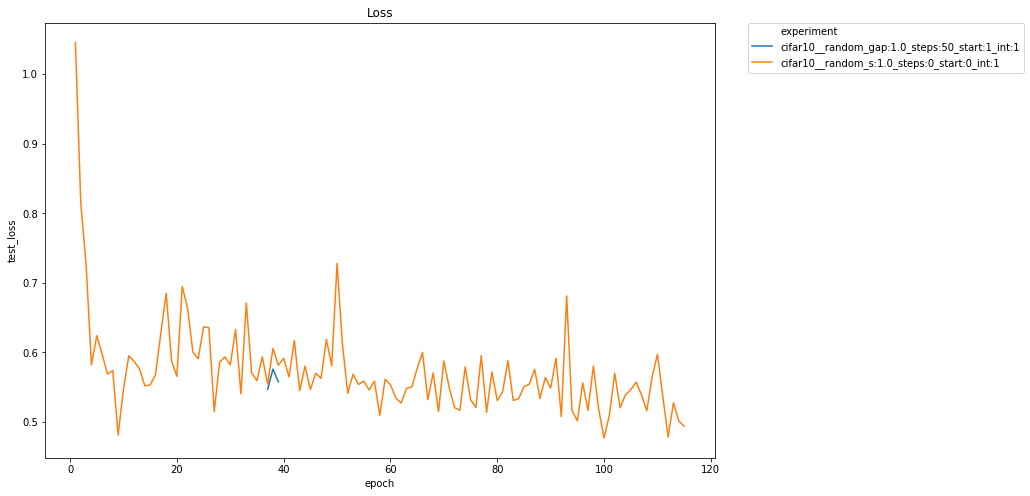

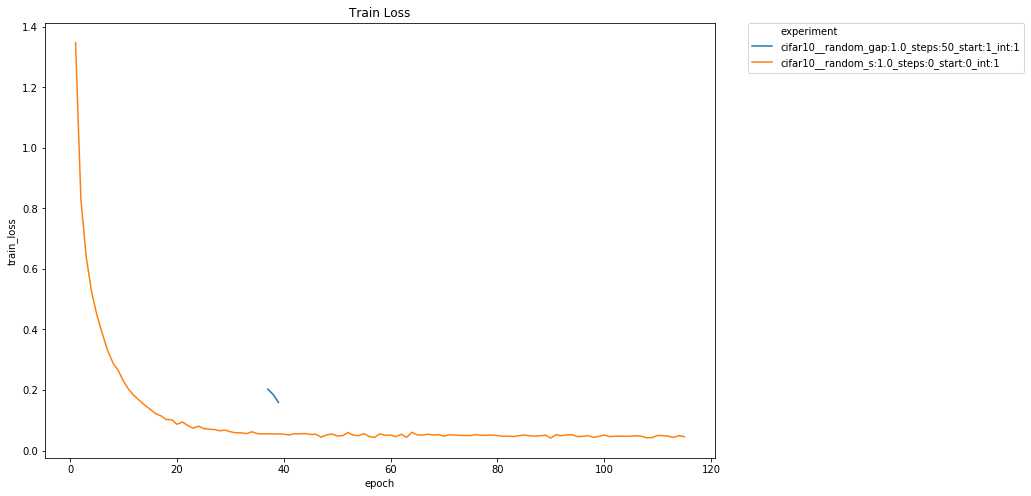

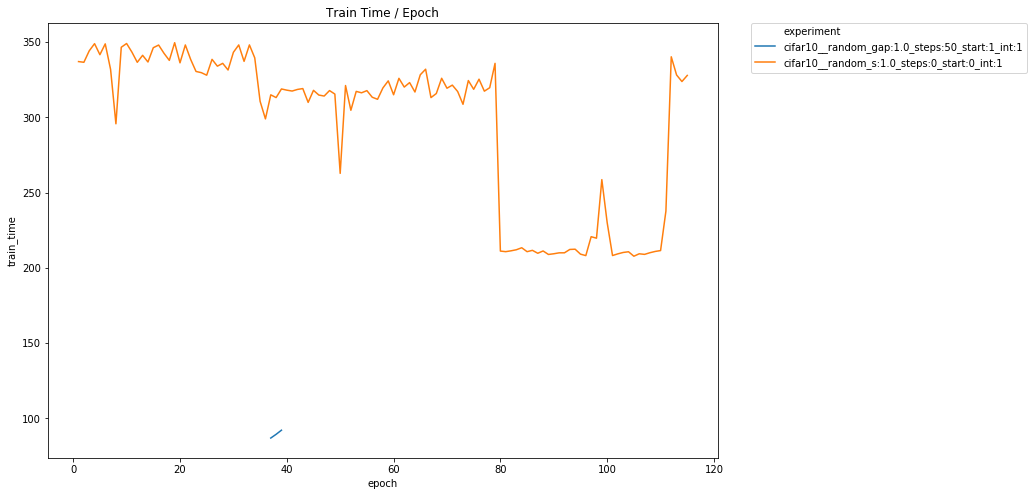

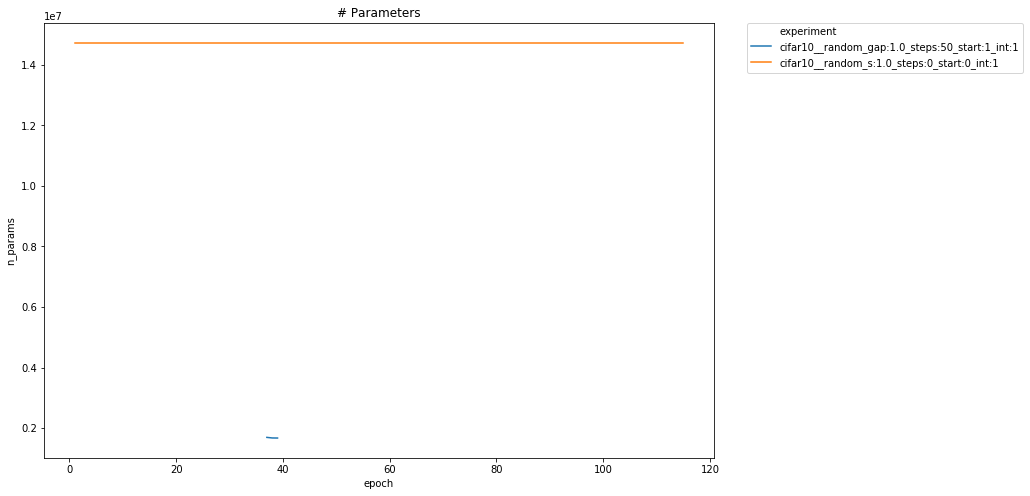

In [19]:


# Print train time
print ("Accuracy")
performance_df = plot_df.groupby(['experiment', 'timestamp']).max()
performance_df = performance_df.groupby(['experiment']).mean()
print (performance_df.filter(items=["experiment", "test_acc"]))

# Print train time
print ("Training time")
time_df = plot_df.groupby(['experiment', 'timestamp']).sum()
time_df = time_df.groupby(['experiment']).mean()
print (time_df.filter(items=["experiment", "train_time", "prune_time"]))

# Weight sparsity
print ("Sparsity")
initial_params = np.max(list(plot_df.groupby(['experiment'])["n_params"].max()))
# print (initial_params)
sparsity_df = plot_df.groupby(['experiment', 'timestamp']).min()
sparsity_df = sparsity_df.groupby(['experiment']).min()
print (sparsity_df.filter(items=["experiment", "n_params"]) / initial_params * 100)


# for label in plotting_data:
plt.figure(figsize=(12,8))
sns.lineplot(x="epoch", y="test_acc", hue="experiment", data = plot_df)
plt.title("Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# plt.figure(figsize=(12,8))
# new_plot = plot_df
# new_plot["train_time_cum"] = new_plot.groupby(['experiment', 'timestamp'])['train_time'].apply(lambda x: x.cumsum())
# sns.lineplot(x="train_time_cum", y="test_acc", hue="experiment", data = new_plot)
# plt.title("Accuracy / Wall-clock Time")
# plt.ylim([0.8, 0.98])
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="test_loss", hue="experiment", data = plot_df)
plt.title("Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="train_loss", hue="experiment", data = plot_df)
plt.title("Train Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="train_time", hue="experiment", data = plot_df)
plt.title("Train Time / Epoch")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="n_params", hue="experiment", data = plot_df)
plt.title("# Parameters")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
